# 2020 빅콘테스트 데이터분석 퓨처스리그 Data Glimpse


## 데이터 제공 : 스포츠투아이 

## 목적 : KBO 팀의 정규시즌 잔여기간 팀별 승률, 타율, 방어율 예측

- 2016 ~ Jul 20, 2020 까지 modeling

- Sep 28, 2020 ~ 정규시즌 종료까지 test

###  설명회 중 data에 대한 설명 : https://www.youtube.com/watch?v=YAIKbArBmPY

1:20:42 ~ 1:23:30

### 추가 데이터가 필요할 경우

www.koreabasketball.com  - 기록 - 기록실

레전드닷컴 - KBO리그 - KBO기록실

APP(KBO)
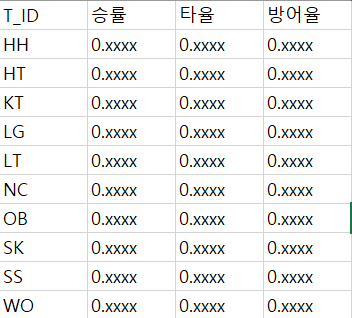
APP(KBO STATS)

# PROVIDED DATA 설명




### 팀 타자 SHEET

1) G_ID

2) GDAY_DS

3) T_ID

4) VS_T_ID

5) HEADER_NO

6) TB_SC (이닝 초 / 말 (FACTOR))

7) PA : 타자

8) AB : 총 타수

9) RBI : 타점

10) RUN : 득점

11) HIT : 안타

12) H2 : 2루타

13) H3 : 3루타

14) HR : 홈런

15) SB : 도루

16) CS : 도루실패

17) SH : 희생타

18) SF : SACRIFICED FLY

19) BB 

20) IB

21) HP

22) KK

23) GD : 병살타

24) ERR

25) LOB 잔루 (이닝이 끝날 때 남아있는 타자 수)

26) P_HRA_RT : 득점권 타율 (동일 팀 타자가 2루? 이상 있을 때 타율)

27) P_AB_CN : 득점권 타수

28) P_HIT_CN : 득점권 안타. 즉, 26번은 28번을 27번으로 나눈 것과 같다고 알고 있음. CHECK!


### 개인 타자 SHEET

팀 타자와 안 겹치는 것만 :

- P_ID : 선수코드

- START_CK : 선발 여부

- BAT_ORDER_NO : 출전타순
 



## 테이블 위주 설명

## 모든 데이터에 "2020빅콘테스트_스포츠투아이_제공데이터_"라는 말이 들어가있다. 이를 빼면 좋겠다.

## 아래 내가 그루핑을 해놨는데 그 그룹 안에는 당연히 16~20으로 5개 그룹이 있다.


### Group 1) 팀 (Not used directly in modeling)

Jan 17, 2013, 마지막 KT WIZ가 창단하면서 10개팀 리그가 시작되었다. 

즉, 16~20년 계속 10개 팀인 상태이다.

1) T_ID : 팀 ID 2글자

2) T_NM 

이 둘은 1:1 대응하는데 1)을 쓰는 게 낫다. 이유는 다른 파일들이 team id를 쓰므로!

### Group 2) 경기 (Not used directly in modeling)

1) G_ID : 각 경기를 구분하는 코드 

: 의미 없어보임. 왜? 2), 3), 4)로 100% 설명되므로!

2) GDAY_DS : 일자 -> 계절, 월별 factor 혹은 그 날 기온, 습도 등 날씨와 엮으면 될듯

3) VISIT_KEY : 원정팀 code

4) HOME_KEY : 홈팀 code -> 3)과 대응

5) HEADER_NO : 더블헤더코드 (매우 드물게 한 날에 두 경기를 하는데 이를 DOUBLE HEADER라고 한다. 0이 일반, 1이 DH 1차전, 2가 DH 2차전)

6) GWEEK : 요일, 한글로 월~일로 되어있다.

7) STADIUM : 구장.

10 factors. 2글자로 잠실 , 고척, 문학 등등 위도, 경도를 쓸 수 있겠음.

First, 데이터를 쓰는 것이 가능할까? 

Second, 위도,경도가 의미가 있을까? 



### Group 3) 선수 (선수 정보에 대한 것이다)

1) GYEAR : 시즌 

2) PCODE : 선수 CODE

3) NAME : 선수명 (역시 2)나 3) 중 하나만 쓰면 될듯)

4) T_ID : 팀 코드

5) POSITION

6) AGE_VA : 선수연령

7) MONEY : 연봉. 전처리 할 때 "만원" 부분을 0000으로 채워서 수치화해야 함



16~20을 merge해야 할듯하다.

시즌에 따라 달라지는 것은 팀(trade, 이적 가능), position...(?), age, money인듯

### Group 4)  등록선수 

1) GDAY_DS : 경기 SHEET에 있는 것처럼 경기일자 (경기가 매일 있는것인지는 모르겠지만 glimpse로는 매일로 보인다)

2) T_ID : 팀 SHEET에 있는 것처럼 팀 코드

3) P_ID : 선수코드 -> Group3에서 선수명이 아니라 선수코드가 쓰였다.

4) ENTRY_YN : 등록말소 여부 (FACTOR). 등록말소가 출전명단에 있는지 여부일까? 아니면 방출 여부인가?



### Group 5) 팀 투수 

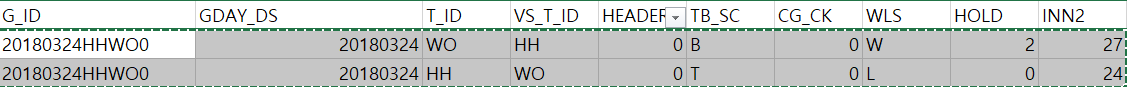

위 이미지처럼 pairwise data임에 유의!


1) G_ID

2) GDAY_DS

3) T_ID

4) VS_T_ID

5) HEADER_NO 

2018년을 예로 들면 1440 record들 중 8개밖에 없다. 정말 체력적인 영향이 (검증 필수) 중요하다면 넣어야겠으나 극심히 overdispersed여서 넣어야 할지 매우 의구심이 든다.

6) TB_SC : 이닝 초 / 말 (FACTOR)

7) CG_CK : 완투 여부 (FACTOR)

8) WLS : 결과 . 승 W , 패 L, 세 S, 무 D. 홈 팀 기준으로 승패세무인지 검증 필수!

9) HOLD : hold 여부 (FACTOR)

10) INN2 : 이닝*3 (정수화를 위해. 가령 9INNING이면 27)

거의 대부분 27 혹은 24이다. 24는 9회 말이 없을 때

11) BF : 투구수

12) PA : 상대타자 **숫자**

13) AB : 상대타자 **타수**

14) HIT 허용 

15) H2 : 2루타 허용 

16) H3 : 3루타 허용 

17) HR : 홈런 허용 

18) SB : STOLEN BASE (도루)

19) CS : 도루실패

20) SH : 희생타 SACRIFICED HIT

21) SF : SACRIFICED FLY 

22) BB : 4구

23) IB : 고의4구

24) KK : STRIKEOUT

25) GD : 병살타

26) WP : 폭투

27) BK : 보크

28) ERR : 실책

29) R : 총 실점 (RUN)

30) ER : 자책점 : 투수의 책임이 있는 실점 수

31) P_WHIP_RT : 득점권 WHIP

32) P2_WHIP_RT : 2점차 이하 WHIP

33) CB_WHIP_RT : 345번타자 WHIP 




### Group 6) 개인투수 

팀 투수와 안 겹치는 것만 :

- P_ID : 선수코드

- START_CK : 선발 여부

- RELIEF_CK : 구원 여부 (선발 여부와 100% 상관)

$START_{CK} + RELIEF_{CK} =1$

- CG_CK : 완투 여부

- QUIT_CK : 마지막 투수 여부

- WLS : 승 패 세 (무 D가 빠진걸로 알고 있다)


### 의문점 : 팀 데이터는 개인 데이터의 단지 가중합 / 가중평균으로 구할 수 있는 것 아닌가? 이 의문이 든 이유는 개인 타자/투수 데이터가 모든 경기를 aggregate한 데이터가 아니라 경기별 데이터이기 때문이다.

### Group 7) 팀 타자 

1) G_ID

2) GDAY_DS

3) T_ID

4) VS_T_ID

5) HEADER_NO

6) TB_SC (이닝 초 / 말 (FACTOR))

7) PA : 타자

8) AB : 총 타수

9) RBI : 타점

10) RUN : 득점

11) HIT : 안타

12) H2 : 2루타

13) H3 : 3루타

14) HR : 홈런

15) SB : 도루

16) CS : 도루실패

17) SH : 희생타

18) SF : SACRIFICED FLY

19) BB 

20) IB

21) HP

22) KK

23) GD : 병살타

24) ERR

25) LOB 잔루 (이닝이 끝날 때 남아있는 타자 수)

26) P_HRA_RT : 득점권 타율 (동일 팀 타자가 2루? 이상 있을 때 타율)

27) P_AB_CN : 득점권 타수

28) P_HIT_CN : 득점권 안타. 즉, 26번은 28번을 27번으로 나눈 것과 같다고 알고 있음. CHECK!


### Group 8) 개인 타자

팀 타자와 안 겹치는 것만 :

- P_ID : 선수코드

- START_CK : 선발 여부

- BAT_ORDER_NO : 출전타순
 


# Curiosity / Things to Consider

## 0)Sports는 adversarial game이라고 하여 pairwise data이다. 상대 투수의 삼진이 내 타자의 피 삼진이다. 이러한 연관관계를 고려하나? 고려하면 어떻게 하나?

## 1) Column 데이터 추가의 자유? (가령 그 날 그 지역의 온도, 경기 관객 수 등등 외부데이터)

## 2) Row 추가의 자유? Modeling의 끝과 Test의 시작 사이에 2달 가까이 gap이 있다

## 3) 팀 타자/투수가  개인 타자/투수가 제공 못하는 marginal info가 있나?

## 4) Template이 이런 모양?

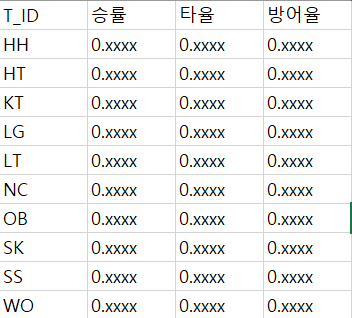


## 5) 나중에 무슨 모델을 써야 할까? 가장 어려운 것은 타율, 방어율이다. 가령 타율을 예측한다면 한 선수의 타석수, 안타수를 둘 다 예측을 할 것인가? 혹은 [0,1] 사이 bounded 타율을 직접 예측?

## 6) 바이러스를 고려?

## 7) 변수 추가에 있어서 논문 / 선행프로젝트 참조?


